In [15]:
from Forest_Fire import ForestFire
from Map_Generator import show_map, Square_Burn
import geopandas
from matplotlib import pyplot as plt
import imageio

In [21]:
world = geopandas.read_file('area.geojson')
#world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

In [24]:
world


,id,name,geometry,gdp_per_cap
0,0,0,POLYGON ((-111.9942625694703 80.09209662373779...,0.48
1,1,1,POLYGON ((-111.9421312847352 80.09209261005337...,0.24
2,2,2,"POLYGON ((-111.89 80.09208859636895, -111.8378...",0.31
3,3,3,POLYGON ((-111.8378687152648 80.09208458268454...,0.24
4,4,4,POLYGON ((-111.9942625694703 80.10105232555331...,0.28
5,5,5,POLYGON ((-111.9421312847352 80.10104831186889...,0.10
6,6,6,"POLYGON ((-111.89 80.10104429818448, -111.8378...",0.07
7,7,7,POLYGON ((-111.8378687152648 80.10104028450006...,0.02
8,8,8,POLYGON ((-111.9942625694703 80.11000802736883...,0.29
9,9,9,POLYGON ((-111.9421312847352 80.11000401368442...,0.05


In [23]:
fire = ForestFire((n+1) * 10, (m+1)*10, 0.5)
fire.run_model()
world['gdp_per_cap'] = Square_Burn(fire.MatrixHistory[0],3,3)

/Users/julianchan/anaconda3/envs/test/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


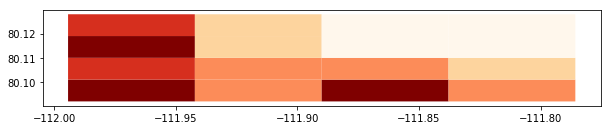

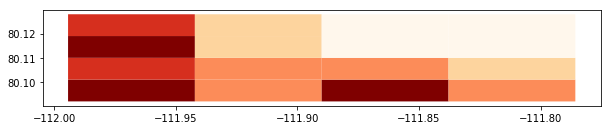

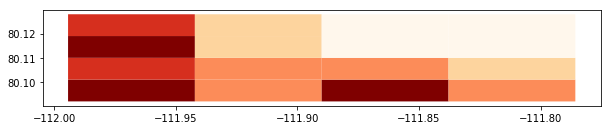

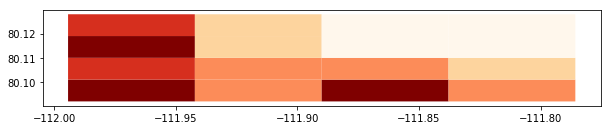

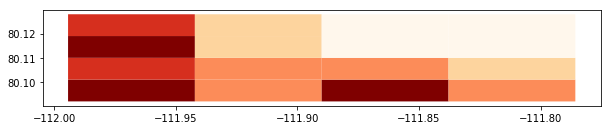

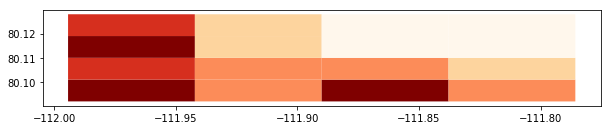

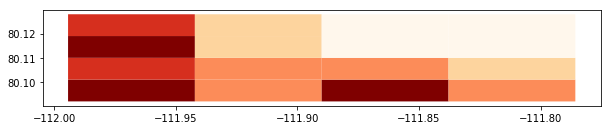

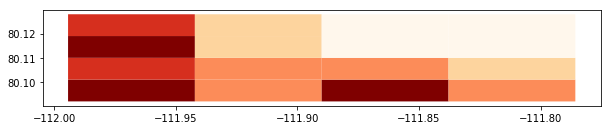

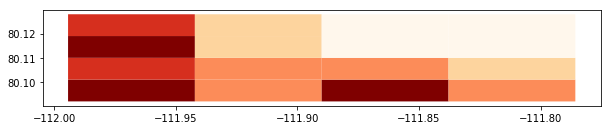

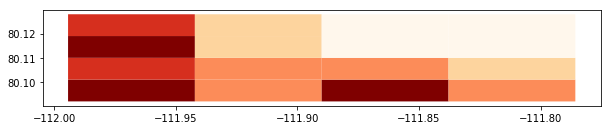

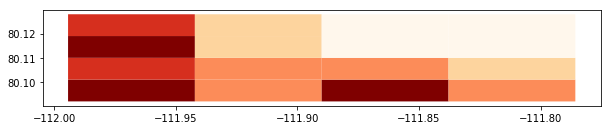

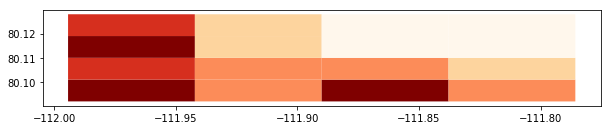

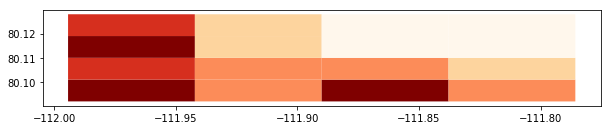

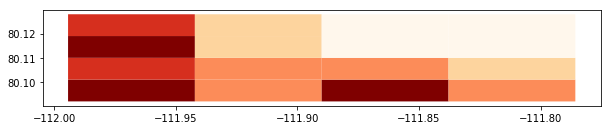

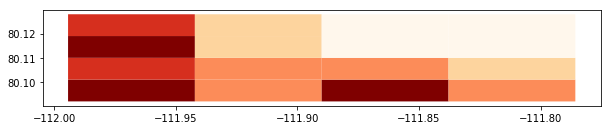

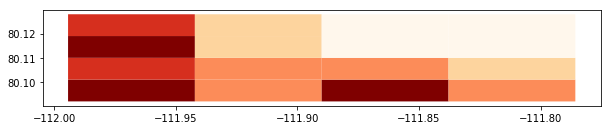

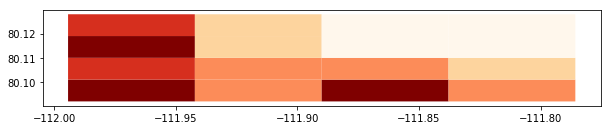

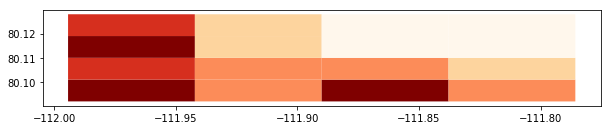

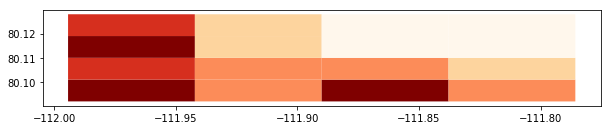

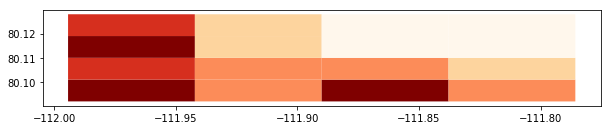

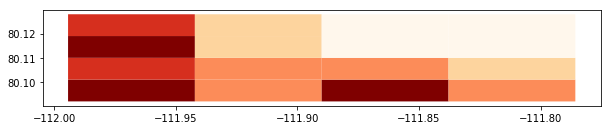

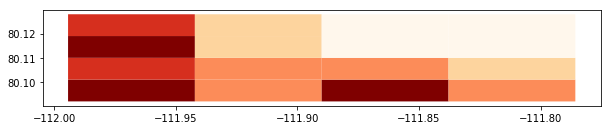

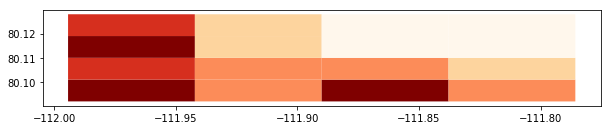

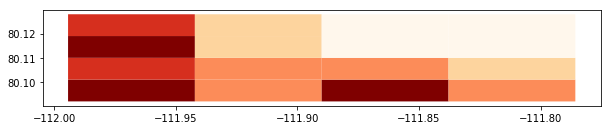

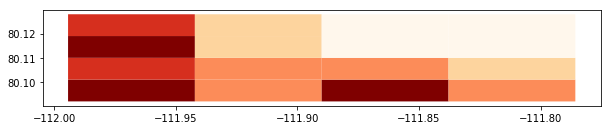

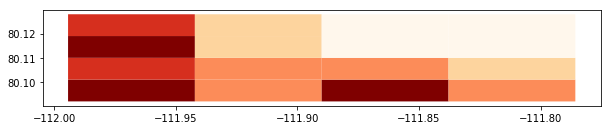

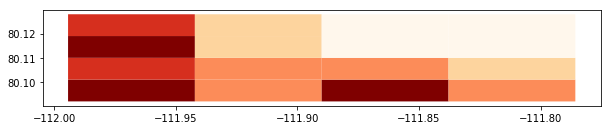

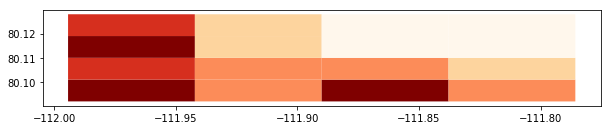

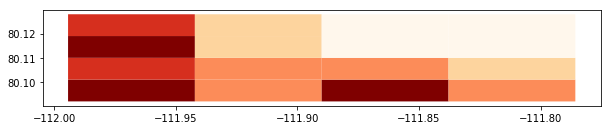

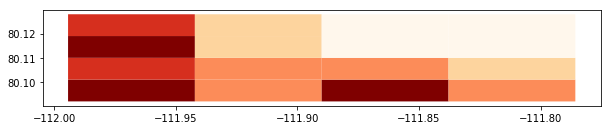

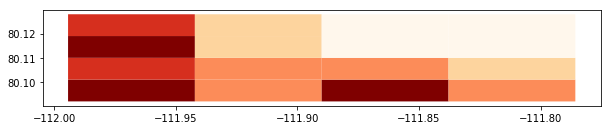

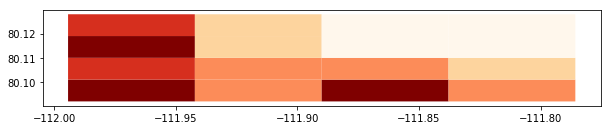

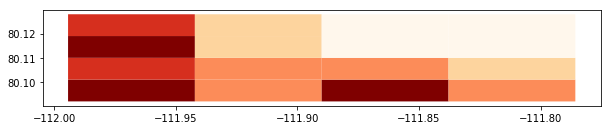

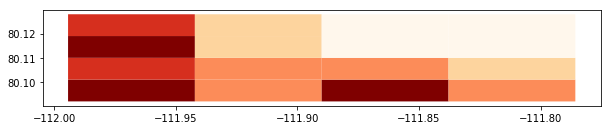

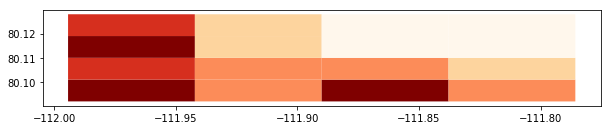

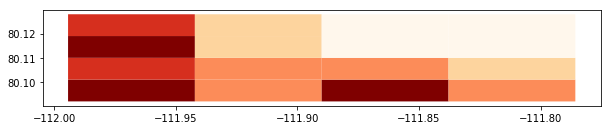

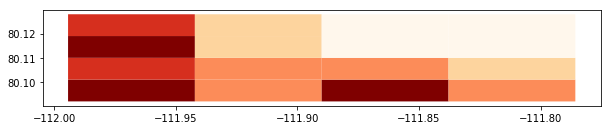

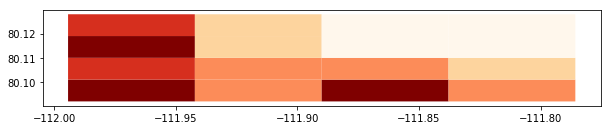

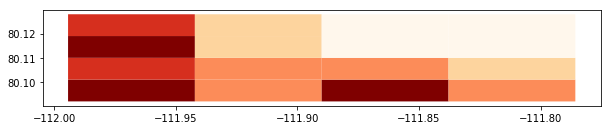

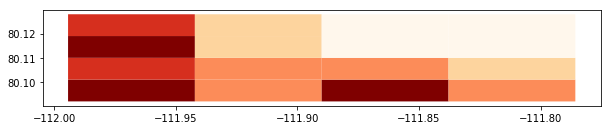

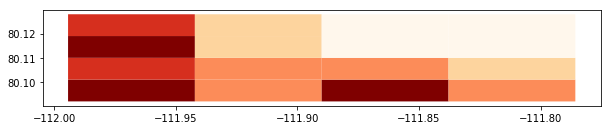

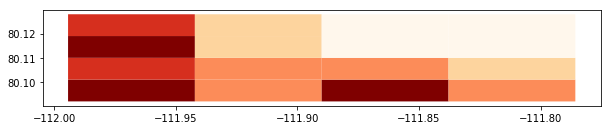

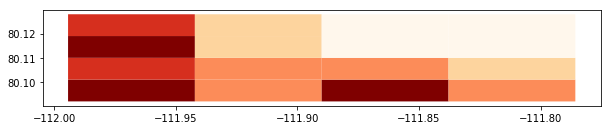

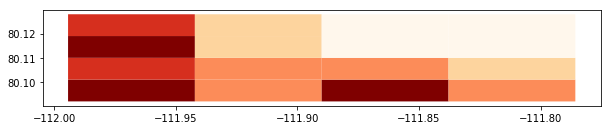

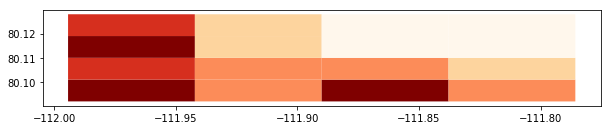

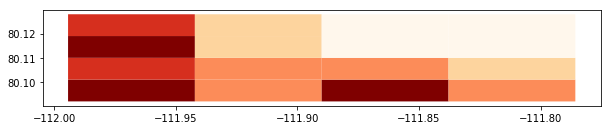

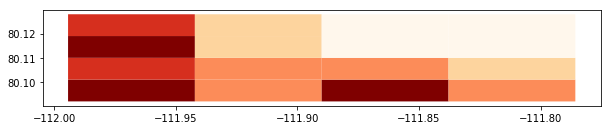

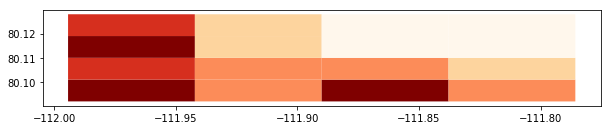

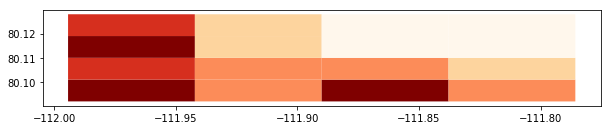

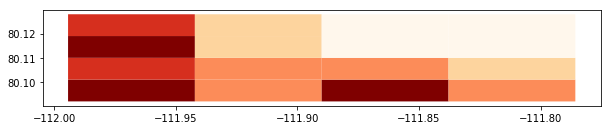

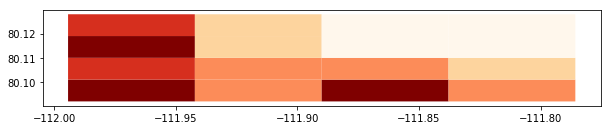

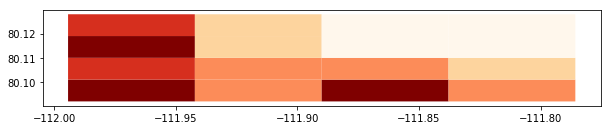

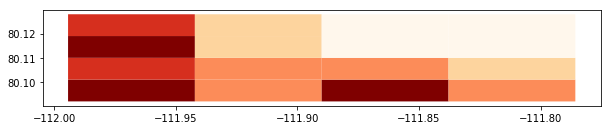

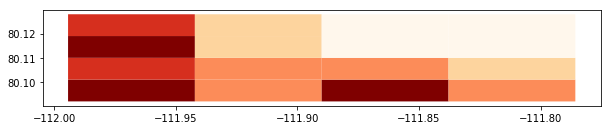

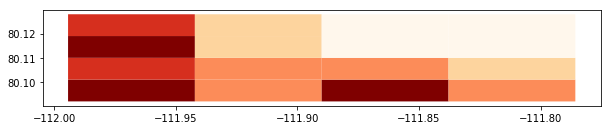

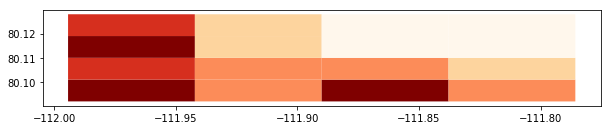

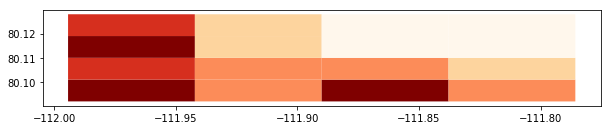

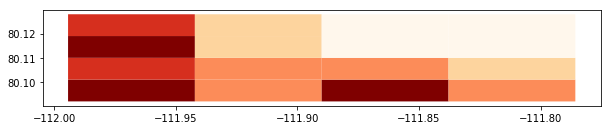

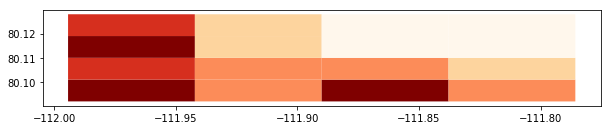

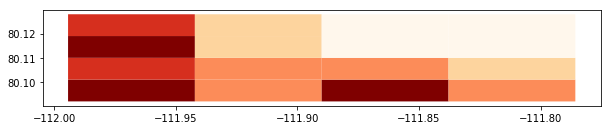

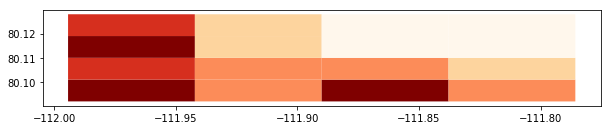

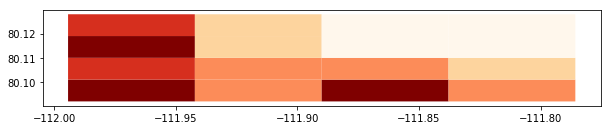

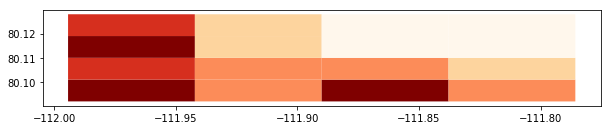

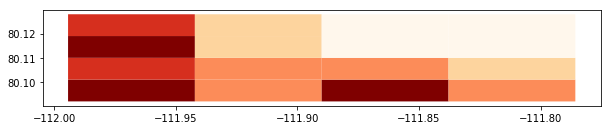

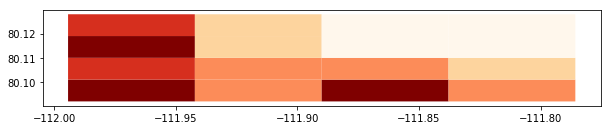

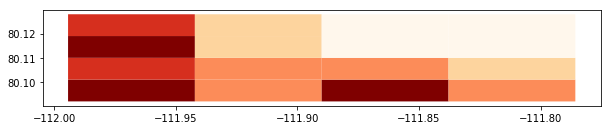

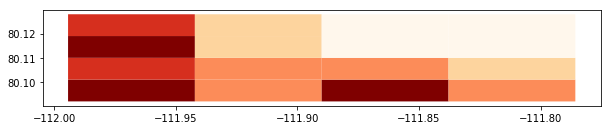

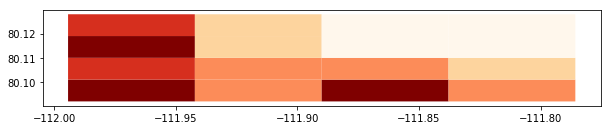

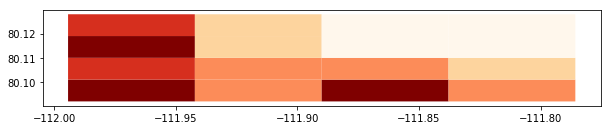

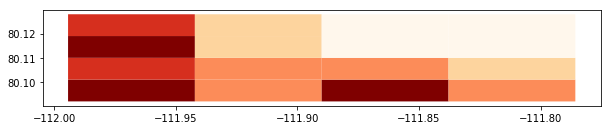

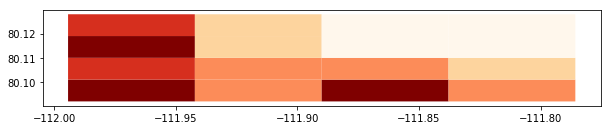

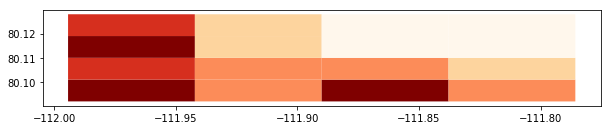

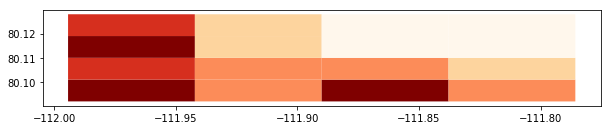

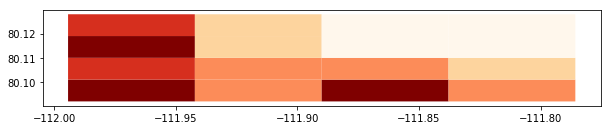

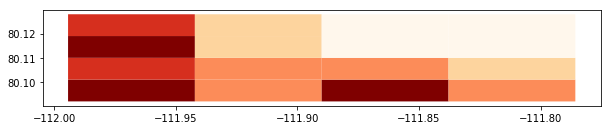

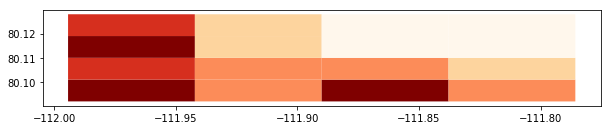

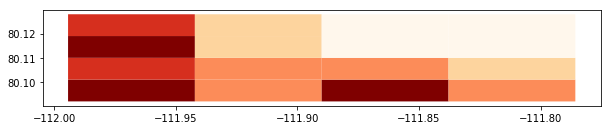

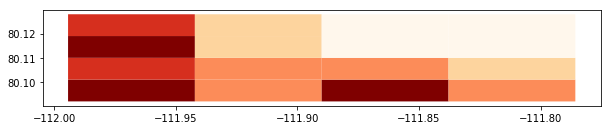

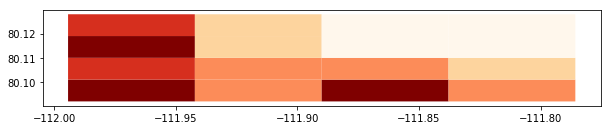

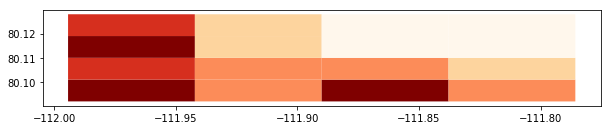

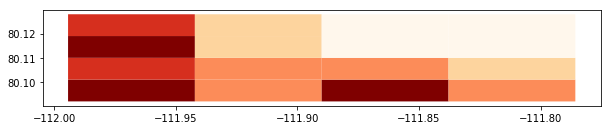

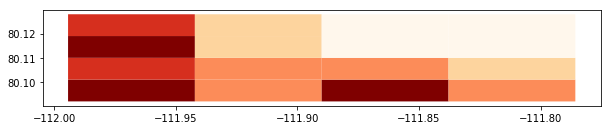

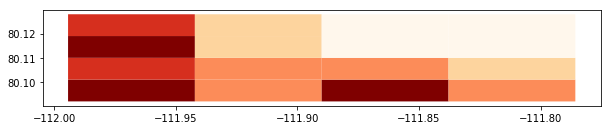

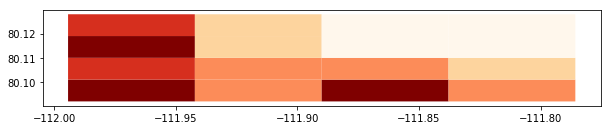

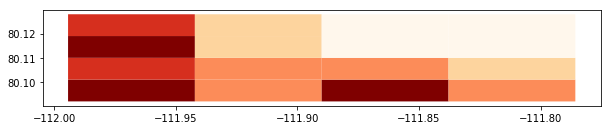

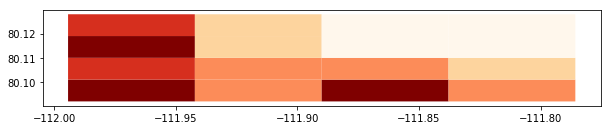

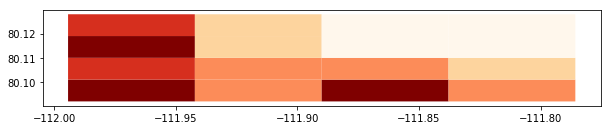

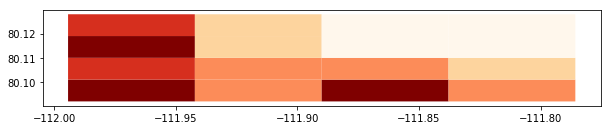

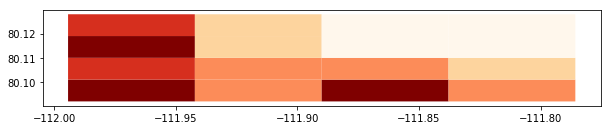

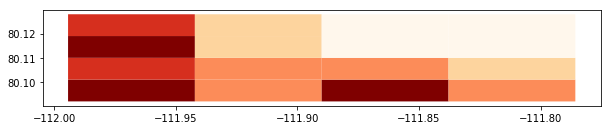

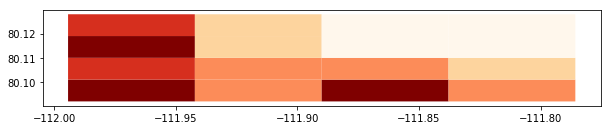

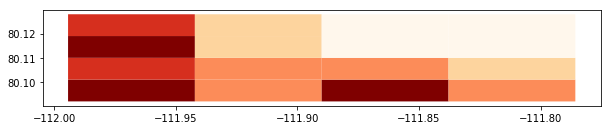

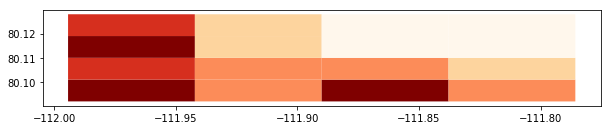

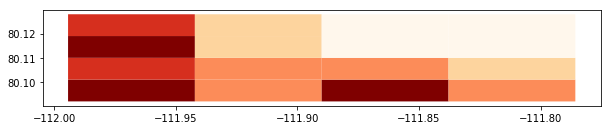

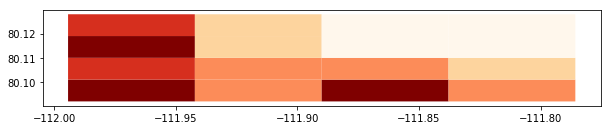

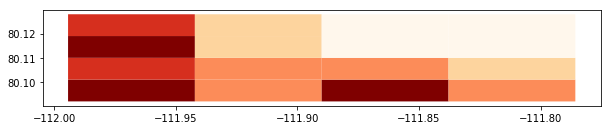

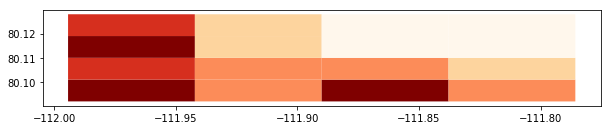

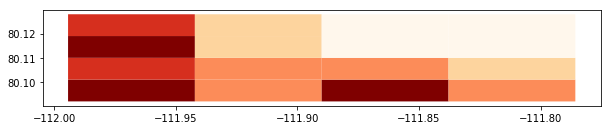

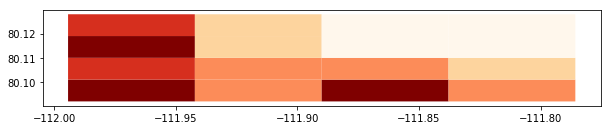

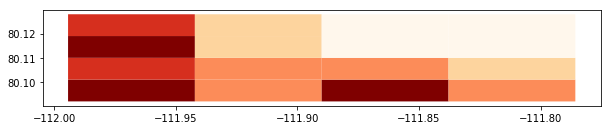

In [26]:

images = []
for i in range(100):
    world['gdp_per_cap'] = Square_Burn(fire.MatrixHistory[i],3,3)
    world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles', figsize=(10, 3))
    #plt.axis((-180+i, -90+i, 0, 90))
    filename = 'tiles/slice{:0d}.png'.format(i)
    plt.savefig(filename)
    images.append(imageio.imread(filename))

imageio.mimsave('output.gif', images, fps=10)

In [18]:
show_map()

Enter the latitude: 80.11
Enter the longitude: -111.89
Enter (an odd) number of subdivision for longitude3
Enter (an odd) number of subdivision for latitude3
Enter the length of the evacuation area (in KM): 5
Enter the width of the evacuation area (in KM): 5
